# Assignment 3: Classification with Logistic Regression

# Total: /100

## Instructions

* Complete the assignment

* Once the notebook is complete, restart your kernel and rerun your cells

* Submit this notebook to owl by the deadline

* You may use any python library functions you wish to complete the assignment.

## The Dataset

The goal of our classifier is to predict, using a logistic regression, if a patient may take a certain drug.

The dataset contains both numerical and categorical input variables, while the response variable ('Drug') has multiple levels. To simplify our analysis here, we focus on predicting if a patient may take "Drug-Y".

In [1]:
# You may need these
import pandas as pd
import seaborn as sns

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.metrics import confusion_matrix, roc_curve, precision_recall_curve, auc, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt
seed=0
%matplotlib inline

## Question 1: /18 pts

1. Read in the `drug.csv` dataset and display the first 5 rows.
2. Print out all columns in the dataset and list categorical variables. Use the build-in function `get_dummies()` to convert all categorical variables (**exclude Drug variable**) to dummy variables. You may read the official explanations for more information on `get_dummies()` [here](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html). What's the size of the dataframe after transforming it?
3. Map the target values from yes/no to 1/0. What is the baseline accuracy for this classification problem? Round into 1 decimal place (for example, 50.1% or 0.501).

1.1 Read the dataset and display the first 8 rows, and print out all columns in the dataset and **list** all categorical variables in the answer part.

In [2]:
# Question 1.1 code here

#Dataset is read and already prepped as was described in Q.1.

df = pd.read_csv("drug.csv")

print("The first 8 rows: \n",df.head(5))
print("\nThe columns: \n",df.columns.values)
print("\nThe columns with catagorical variables: \n",df.select_dtypes(include=['object']).head())

#5 pts

The first 8 rows: 
    Age Sex      BP Cholesterol  Na_to_K   Drug
0   23   F    HIGH        HIGH   25.355  DrugY
1   47   M     LOW        HIGH   13.093  DrugY
2   47   M     LOW        HIGH   10.114  DrugY
3   28   F  NORMAL        HIGH    7.798  drugX
4   61   F     LOW        HIGH   18.043  DrugY

The columns: 
 ['Age' 'Sex' 'BP' 'Cholesterol' 'Na_to_K' 'Drug']

The columns with catagorical variables: 
   Sex      BP Cholesterol   Drug
0   F    HIGH        HIGH  DrugY
1   M     LOW        HIGH  DrugY
2   M     LOW        HIGH  DrugY
3   F  NORMAL        HIGH  drugX
4   F     LOW        HIGH  DrugY


**YOUR ANSWER HERE:** [1pt] 
The Catagorical variables, as displayed above, are Sex, Blood Pressure, Cholesterol, and Drug type taken.

1.2 Check that is any there missing value in each column of the dataset.  

In [3]:
# Question 1.2 code here
nan_values = df.isna()
print(nan_values.sum())
#2 pts

Age            0
Sex            3
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64


1.3 Replace all the missing values in **Sex** to be 'M'.

In [4]:
# Question 1.3 code here
df = df.fillna("M")
#2 pts

1.4 Use the build-in function `get_dummies()` to convert all categorical variables (**excluding `Drug` variable**) to dummy variables. What's the size of the dataframe after transforming?

In [5]:
# Question 1.4 code here
#Drops Drug, gets dummies of rest, then concats drug back on.
dfC = pd.get_dummies(df.drop("Drug",axis = 1))
dfC = pd.concat([dfC,df.Drug],axis = 1)
print("\nSize of catagorical variable dummy dataframe is: ", dfC.shape)


#2 pts


Size of catagorical variable dummy dataframe is:  (200, 10)


**YOUR ANSWER HERE:** [1pt] As posted above, the size of the dummy dataframe is 200 rows and 10 columns

1.5 Transform all the labels that are 'DrugY' in **`Drug`** to be value 1, otherwise, to be 0. Then transform the type of **`Drug`** to be 'int'.


In [6]:
# Question 1.5 code here
#Formats drug as expected. Replaces DrugY w/ 1
#Then anything that isn't 1 becomes 0.
#Sets type to int to help later.

dfC.Drug.replace({"DrugY":1},inplace = True)
dfC.loc[dfC.Drug != 1,['Drug']] = 0
dfC.Drug = dfC.Drug.astype('int')
#2 pts

1.6. What is the baseline accuracy for this classification problem? Round into 1 decimal place (for example, 0.2).

In [7]:
# Your code here
#Save baseline for later
baseline = round(dfC.Drug.mean(),4)
print(f"\nThe baseline accuracy is equal to: {baseline}")
#2 pts


The baseline accuracy is equal to: 0.51


**YOUR ANSWER HERE:** [1pt] 

The baseline accuracy is 0.51!

## Question 2: /7 pts

Split the data into train and test for the outcome/response and the predictor variables. Hold out 25% of observations as the test set.  Pass `random_state=11` to `train_test_split` to ensure you get the same train and tests sets as the solution. Your dependent variable in the the dataset is named as `Drug`. How many patients who take "DrugY" in the train dataset and test dataset, respectively?

In [8]:
# Question 2 code here.

#Breaks up x and y then splits them as directed.
y = dfC.Drug.values
X = dfC.drop('Drug',axis='columns').values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=11)

#Sums the values asked for.
print(f"In the training data we have {y_train.sum()} patients taking DrugY. \nIn the test data we have {y_test.sum()}.")

#6 pts correct code

In the training data we have 76 patients taking DrugY. 
In the test data we have 26.


**YOUR ANSWER HERE:** [1pt] Using the random seed 11, we find the values above.

## Question 3: /20 pts

3.1 Create a instance of sklearn's `LogisticRegression` object for **unpenalized** logistic regression.
Using this object, **run a logisitic regression analysis** of `Drug` (y-variable) against `Age` and `Na_to_K` (x-variables) using your training data. Report the parameters (variables and intercept) of your model as indicated with the `print` function.

In [9]:
# Question 3 code here

#Breaks up X into just age and na to K
age_na_train = np.c_[X_train[:,0],X_train[:,1]] #Takes age and Na_to_K values
age_na_test = np.c_[X_test[:, 0], X_test[:, 1]] #Does same but for the test

#Creates the LR and fits it.
drugLR = LogisticRegression(penalty='none')
drugLR.fit(age_na_train,y_train)

#Prints intercept / coeff of the LR ^^
print(f"Intercept:\n{drugLR.intercept_.round(3)}\nCoefficients:\n{drugLR.coef_.round(3)}")

#10 pts 

Intercept:
[-8.72]
Coefficients:
[[-0.011  0.658]]


3.2 Compute 4 label-based criteria, namely, 'Accuracy', 'Precision', 'Sensitivity' and 'Specificity' for your two variables only classifier **using the test data** (Round into 4 decimal place). Use a threshold of 0.5. Answer the questions in this text box below.

In [10]:
## Put code here to compute criteria:
def compute_performance_classifiers(ypred,y,classes):
    #First, get true positives, true negatives, false positives, and false negatives:
    tp = sum(np.logical_and(ypred == classes[1], y == classes[1]))
    tn = sum(np.logical_and(ypred == classes[0], y == classes[0]))
    fp = sum(np.logical_and(ypred == classes[1], y == classes[0]))
    fn = sum(np.logical_and(ypred == classes[0], y == classes[1]))
    print(f"True Positives: {tp} \nTrue Negatives: {tn}\nFalse Positives: {fp}\nFalse Negatives: {fn}") 
    #using these, we calculate the classifiers. 
    #Accuracy
    acc = (tp + tn) / (tp + tn + fp + fn) 
    # Precision
    precision = tp / (tp + fp) 
    recall = tp / (tp + fn) 
    # Sensitivity
    sensitivity = recall 
    # Specificity
    specificity = tn / (fp + tn) 
    # Print results
    print(f"Accuracy: {round(acc,4)} Recall: {round(recall,4)} Sensitivity: {round(sensitivity,4)} Specificity: {round(specificity,4)}") 

#5 pts

In [11]:
## Put the code you need to answer the following questions.
#Set threshold
threshold = 0.5

#Finds probability of y's, then uses the threshold to create
#a level of confidence in our probability. If p(+) < 0.5, we assume (-) outcome
y_test_prob = drugLR.predict_proba(age_na_test)
y_prob = drugLR.classes_[(y_test_prob[:,1]>threshold).astype(int)]

#Prints findings
compute_performance_classifiers(y_prob,y_test,drugLR.classes_)
print(f"Baseline Accuracy: {baseline}")

#2 pts

True Positives: 25 
True Negatives: 22
False Positives: 2
False Negatives: 1
Accuracy: 0.94 Recall: 0.9615 Sensitivity: 0.9615 Specificity: 0.9167
Baseline Accuracy: 0.51


* How many of the test instances are labeled positive by your classifier?

**YOUR ANSWER HERE:**[1 pt] We have 27 positive predictions.

* Does this classifier reach the baseline accuracy?

**YOUR ANSWER HERE:** [1 pt] 
Yes, it surpasses the baseline accuracy by a considerable margin.

* Is this classifier useful for classifying drug-Y? Explain in one or two sentences using the performance matrix results.

**YOUR ANSWER HERE:**[1 pt] 

This seems like a highly effective classifier for classifying Drug-Y. Across  all the performance stats found, the classifier excells.

## Question 4: /8 pts
Now with default penalty method, fit two logistic regression models using tuning parameter $C=0.1$ and $C=1$ to the training data and include all the variables in the data frame (except for `Drug`) in the cell below. You will want to make new objects like you did for the simpler model. Print the parameters (variables and intercept) you obtain, respectively.

In [12]:
# Code for Question 4

#Fits, does the intercept/coef print, just like before.
fulltestLR1 = LogisticRegression(C=0.1)
fulltestLR1.fit(X_train,y_train)
print("\n\nFull Variable Test with C = 0.1:")
print(f"Intercept:\n {fulltestLR1.intercept_.round(3)} \nCoefficients:\n {fulltestLR1.coef_.round(3)}")

fulltestLR2 = LogisticRegression(C=1)
fulltestLR2.fit(X_train,y_train)
print("\n\nFull Variable Test with C = 1:")
print(f"Intercept:\n {fulltestLR2.intercept_.round(3)} \nCoefficients:\n {fulltestLR2.coef_.round(3)}")

#7 pts



Full Variable Test with C = 0.1:
Intercept:
 [-7.956] 
Coefficients:
 [[-0.013  0.603 -0.113  0.113 -0.242  0.366 -0.124  0.238 -0.238]]


Full Variable Test with C = 1:
Intercept:
 [-9.926] 
Coefficients:
 [[-0.025  0.776 -0.261  0.261 -0.721  1.185 -0.464  0.665 -0.665]]


* Describe the differences between the fitted model parameters obtained from the two models here.

**YOUR ANSWER:** [1 pt] 
The coefficients and Intercepts are wildly different in terms of magnitudes, but when considering relative differences, we notice that the F.V.T. with C = 1 has most coefficients at double or triple that of the C=0.1. Further than that both classifiers gave the same sign (+/-) to each cooefficient.

## Question 5: /15 pts

In the cell below, compute the 4 label-based criteria we mentioned in Question 3.2 for the two new classifiers using the test data. (You don't have to copy the function down into this cell; just call it again here.) Use a threshold of 0.5. 

In [13]:
# Code for  Code for answering questions in the below cell

#Self explanatory from earlier
print("Computing Performance Classifiers for Full Test with C = 0.1")
y_full_test_prob_1 = fulltestLR1.predict_proba(X_test)
y_full_prob_1 = fulltestLR1.classes_[(y_full_test_prob_1[:,1]>threshold).astype(int)]
compute_performance_classifiers(y_full_prob_1,y_test,fulltestLR1.classes_)
print(f"Baseline Accuracy: {baseline}")


print("\n\nComputing Performance Classifiers for Full Test with C = 1")
y_full_test_prob_2 = fulltestLR2.predict_proba(X_test)
y_full_prob_2 = fulltestLR2.classes_[(y_full_test_prob_2[:,1]>threshold).astype(int)]
compute_performance_classifiers(y_full_prob_2,y_test,fulltestLR2.classes_)
print(f"Baseline Accuracy: {baseline}")

#9 pts

Computing Performance Classifiers for Full Test with C = 0.1
True Positives: 25 
True Negatives: 24
False Positives: 0
False Negatives: 1
Accuracy: 0.98 Recall: 0.9615 Sensitivity: 0.9615 Specificity: 1.0
Baseline Accuracy: 0.51


Computing Performance Classifiers for Full Test with C = 1
True Positives: 24 
True Negatives: 24
False Positives: 0
False Negatives: 2
Accuracy: 0.96 Recall: 0.9231 Sensitivity: 0.9231 Specificity: 1.0
Baseline Accuracy: 0.51


* How many of the test instances are respectively labeled positive by the two classifiers?

**YOUR ANSWER:** [3 pts] For the C=0.1, we have 25 positive labels, whereas in the C=1, we have 24 positive labels. 

* Among the classifiers in Questions 3 and 4, which one is the **best classifier** for classifying Drug? Explain the possible reason in one or two sentences.

**YOUR ANSWER:** [3 pts] The inherient lack of data from only having 200 points to work with fundamentally makes it such that we could easily get much worse performance for a greater data set. With that in mind still, the Full Test with C=0.1 performed the best, and as such it is the best at classifying Drug.

## Question 6: /14 pts
In the cell below, predict the class coding your own sigmoid function (do NOT use  the predict function from sklear). Compare the first 5 rows using the three models constructed in question 4 and question 5.

In [14]:
# Your code here

#Creates a function for sigmoid (for fun) and class_predictor
#Returns manual(as manual as a program can be) predictions
def sigmoid(x):
    return 1 / (1+np.exp(-x))
def class_predictor(X,intercept,coeff):
    #calculate linear combination
    z = intercept + X@coeff.T
    pred_probabilities = sigmoid(z)
    class_pred = (pred_probabilities > 0.5).astype(int)
    return class_pred


age_na_test_class_pred = class_predictor(age_na_test,drugLR.intercept_,drugLR.coef_)
full_test_1_class_pred = class_predictor(X_test,fulltestLR1.intercept_,fulltestLR1.coef_)
full_test_2_class_pred = class_predictor(X_test, fulltestLR2.intercept_, fulltestLR2.coef_)

#Prints our findings for quick and dirty comparison.
print(age_na_test_class_pred[:5].T,full_test_1_class_pred[:5].T,full_test_2_class_pred[:5].T)
print(drugLR.predict(age_na_test)[:5],fulltestLR1.predict(X_test)[:5],fulltestLR2.predict(X_test)[:5])

#8 pts

[[0 1 1 0 1]] [[0 1 1 0 1]] [[0 1 1 0 1]]
[0 1 1 0 1] [0 1 1 0 1] [0 1 1 0 1]


* Is the probability given by the sigmoid function the probability of a case being negative?

**YOUR ANSWER:**[3pts] No, the probability given by the sigmoid f'n returns the probability of a case being positive.

* By just looking over the first 5 cases, how does the probabilities obtained from the two classifiers in Question 4 changes? Does the change of probability actually change the classification results for the first 5 cases?

**YOUR ANSWER:**[3pts] It does not change for the first five cases, and as such, we can assume very little overall changes. No, it does not change the classification results.

# Question 7: /7 pts

Plot ROC curves for all of your classifiers using the cells below, then answer the following questions, computing whatever quantities you need to answer them.

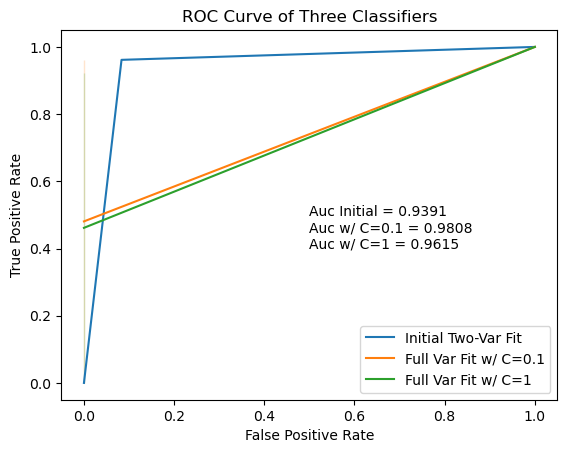

In [15]:
# Your code here
#Made this into a function to cut down typing.
def roc_curve_get(y_test,y_test_prob,pos_label,):
    false_pos_rate, true_pos_rate, _ = roc_curve(y_test,y_test_prob,pos_label=pos_label)
    return false_pos_rate, true_pos_rate, _

#Retrieves all the data for Roc
fpr_i,tpr_i,_ = roc_curve_get(y_test,y_prob,drugLR.classes_[1])
fpr_1,tpr_1,_ = roc_curve_get(y_test,y_full_prob_1,fulltestLR1.classes_[1])
fpr_2, tpr_2, _ = roc_curve_get(y_test,y_full_prob_2,fulltestLR2.classes_[1])

#Creates plot window, titles and labels x/y
fig, ax = plt.subplots()
plt.title("ROC Curve of Three Classifiers")
ax.set_xlabel("False Positive Rate")
ax.set_ylabel("True Positive Rate")

#Puts data into plot, labels it.
ax = sns.lineplot(x=fpr_i,y=tpr_1,label="Initial Two-Var Fit")
ax2 = sns.lineplot(x=fpr_1,y=tpr_1,label="Full Var Fit w/ C=0.1")
ax3 = sns.lineplot(x=fpr_2, y=tpr_2, label="Full Var Fit w/ C=1")

#Finds area under curve for each line, and displays as annotation.
auci = auc(fpr_i,tpr_i)
auc1 = auc(fpr_1,tpr_1)
auc2 = auc(fpr_2, tpr_2)

plt.annotate(f"Auc Initial = {round(auci,4)}\nAuc w/ C=0.1 = {round(auc1,4)}\nAuc w/ C=1 = {round(auc2,4)}",xy=(.5,.4))

plt.show()
#6 pts

* Which classifier has a highest estimated probability of correctly distinguishing between a positive and a negative instance? How do you know?

**YOUR ANSWER:** [1 pts] Due to the area under curve being the probability that the classifier will get a prediction right, we can then see that the C=0.1 classifier has the greatest accuracy.


# Question 8: /11 pts

Multiclass Logistic Regression

In the classification lab, we trained a binary LR classifier using the _mnist_ dataset to discriminate entries which were equal to 5 from the rest. This time you have 10 classes i.e., 0, 1, 2, 3, 4, 5, 6, 7, 8, and 9. Use the same dataset and `SGDClassifier` to tain a multiclass logistic regression model with `l2` regularization. For training, include these arguments too: `max_iter=2000`, `tol=1e-3`, `random_state=seed`. For computation speed-up, some `sklearn` functions take the argument `n_jobs=N` to run in parallel. A good value for N can be the number of physical CPU cores that your machine possesses. Check the documentations of the functions to take advantage from this where applicable. For splitting the data use `test_size=0.5` and `random_state=seed`.

Put your classifier and the `StandardScaler()` into a pipeline using `make_pipeline`. Therefore, your final model will be a pipeline that always standardizes the data before feeding it to the classifier. Use the `classification_report` to report the performance of your final model (*i.e.*, the pipeline) over the **test set**.



In [16]:
# code here

#Just got too tired working on this
from sklearn.datasets import fetch_openml # a helper function to download popular datasets
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X = mnist["data"]
y = mnist["target"]
y = y.astype(np.uint8)
#y =  pd.DataFrame(mnist["target"])
#y = pd.get_dummies(y).values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=11)

SGD_Classifier = SGDClassifier(max_iter=2000,tol=1e-3,random_state=11,n_jobs=6)
SGD_Classifier.fit(X_train,y_train)

SGD_Classifier.predict(X[0])

#Got too tired and this is all I wrote down.
#9 pts

ValueError: Expected 2D array, got 1D array instead:
array=[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   3.  18.
  18.  18. 126. 136. 175.  26. 166. 255. 247. 127.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.  30.  36.  94. 154. 170. 253.
 253. 253. 253. 253. 225. 172. 253. 242. 195.  64.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.  49. 238. 253. 253. 253. 253. 253.
 253. 253. 253. 251.  93.  82.  82.  56.  39.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.  18. 219. 253. 253. 253. 253. 253.
 198. 182. 247. 241.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.  80. 156. 107. 253. 253. 205.
  11.   0.  43. 154.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.  14.   1. 154. 253.  90.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0. 139. 253. 190.
   2.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  11. 190. 253.
  70.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  35. 241.
 225. 160. 108.   1.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  81.
 240. 253. 253. 119.  25.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  45. 186. 253. 253. 150.  27.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.  16.  93. 252. 253. 187.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0. 249. 253. 249.  64.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  46. 130. 183. 253. 253. 207.   2.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  39. 148.
 229. 253. 253. 253. 250. 182.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  24. 114. 221. 253.
 253. 253. 253. 201.  78.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.  23.  66. 213. 253. 253. 253.
 253. 198.  81.   2.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.  18. 171. 219. 253. 253. 253. 253. 195.
  80.   9.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.  55. 172. 226. 253. 253. 253. 253. 244. 133.  11.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0. 136. 253. 253. 253. 212. 135. 132.  16.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

Let's see how the model generalizes to new data.

You can run the cell below to see how well your model can recognize a digit written by the mouse cursor. Set the `final_model` variable according to the name choses for your pipeline, run the cell, draw on the pop-up canvas, and once you close the canvas you will see the result.

This code will not work on headless servers such as Colab. You need to install the `tk-tools` package and run it locally.

In [ ]:
final_model =   # here use the name of your pipeline

#!pip install tk-tools
from tkinter import *
import tkinter as tk
from PIL import Image
import io
import matplotlib as mpl

temp_file_name="TEMP_image_TEMP.jpg"

app = Tk()
app.geometry("300x300")

canvas = tk.Canvas(app, bg='white')
canvas.pack(anchor='nw', fill='both', expand=1)

def get_x_and_y(event):
    global lasx, lasy
    lasx, lasy = event.x, event.y

def draw_smth(event):
    global lasx, lasy
    canvas.create_line((lasx, lasy, event.x, event.y), fill='red', width=3.5)
    lasx, lasy = event.x, event.y
    ps = canvas.postscript(colormode = 'color')
    img = Image.open(io.BytesIO(ps.encode('utf-8')))
    img.save(temp_file_name)

canvas.bind("<Button-1>", get_x_and_y)
canvas.bind("<B1-Motion>", draw_smth)

app.mainloop()

img = Image.open(temp_file_name)
#resize image to 28x28 pixels
img = img.resize((28,28))
#convert rgb to grayscale
img = img.convert("L")
img = np.array(img)
img = 255.0 - img
print("Your input:")
plt.imshow(img, cmap = mpl.cm.binary); plt.axis("off")
plt.show()

# reshaping to support our model input
img = np.reshape(img, 28*28)
#predicting the class
print('Input recognized as ' + str(final_model.predict([img])[0])+'.')

* Despite showing great scores in training and testing stages, why your model does not generalize well to new data?

**YOUR ANSWER:** [2 pts]
